In [3]:
###Q3

import numpy as np

###(a)
np.random.seed(42)

n=100
X = np.random.normal(size=n)
epsilon = np.random.normal(size=n)

###(b)

# 設定常數
beta_0 = 1
beta_1 = 0.5
beta_2 = -0.3
beta_3 = 0.1

# 生成 Y
Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + epsilon




In [4]:
###（c)

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

X_poly = np.column_stack([X**i for i in range(1, 11)])

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select="auto", direction="forward", scoring="neg_mean_squared_error", cv=5)
sfs.fit(X_poly, Y)

selected_features_forward = sfs.get_support()

model.fit(X_poly[:, selected_features_forward], Y)
coefficients = model.coef_
intercept = model.intercept_

print("Selected features (forward):", selected_features_forward)
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Selected features (forward): [ True  True  True  True  True False False False False False]
Intercept: 0.803337164131578
Coefficients: [ 0.53917333  0.06419207  0.00116642 -0.04873429  0.00935198]


In [5]:
###(d)

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
import numpy as np

# 創建多項式特徵矩陣 X_poly，包含 X 到 X^10 的特徵
X_poly = np.column_stack([X**i for i in range(1, 11)])

# 初始化線性回歸模型
model = LinearRegression()

# 設置後向逐步選擇器
sfs_backward = SequentialFeatureSelector(
    model,
    n_features_to_select="auto",      # 自動選擇特徵數量
    direction="backward",             # 後向選擇，從所有變數開始逐步移除變數
    scoring="neg_mean_squared_error", # 評分方式為負均方誤差
    cv=5                              # 使用 5 折交叉驗證
)
sfs_backward.fit(X_poly, Y)

# 獲取被選中的特徵
selected_features_backward = sfs_backward.get_support()

# 使用選中的特徵重新擬合線性回歸模型
model.fit(X_poly[:, selected_features_backward], Y)
coefficients = model.coef_
intercept = model.intercept_

# 輸出選擇的特徵、截距和係數
print("Selected features (backward):", selected_features_backward)
print("Intercept:", intercept)
print("Coefficients:", coefficients)


Selected features (backward): [ True  True  True  True False  True False False False False]
Intercept: 0.8330879503476085
Coefficients: [ 0.53027057 -0.09015993  0.03044834  0.0411951  -0.01232224]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020482069506954304, tolerance: 0.011313121799905382
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2770325430930711, tolerance: 0.011313121799905382
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018768735029468075, tolerance: 0.011313121799905382
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683

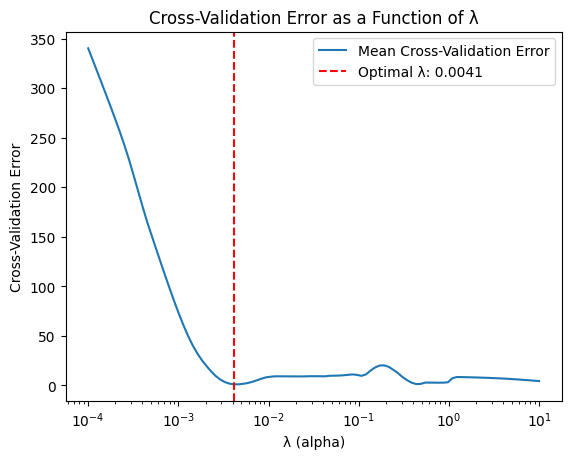

Optimal λ (alpha): 0.004132012400115334
Lasso Coefficients: [ 2.57225598e-01  0.00000000e+00  4.74695852e-01 -7.12671380e-02
 -1.37458196e-01  1.23550010e-02  3.24284518e-04  1.48157033e-04
  2.06067875e-03 -7.60156595e-05]


In [6]:
###(e)

from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 100), cv=5, random_state=0)
lasso_cv.fit(X_poly, Y)

plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1), label="Mean Cross-Validation Error")
plt.xscale("log")
plt.xlabel("λ (alpha)")
plt.ylabel("Cross-Validation Error")
plt.title("Cross-Validation Error as a Function of λ")
plt.axvline(lasso_cv.alpha_, color="red", linestyle="--", label=f"Optimal λ: {lasso_cv.alpha_:.4f}")
plt.legend()
plt.show()

lasso_coefficients = lasso_cv.coef_
print("Optimal λ (alpha):", lasso_cv.alpha_)
print("Lasso Coefficients:", lasso_coefficients)

Selected features (forward stepwise): [False  True  True  True False  True  True False False False]
Intercept (forward): 0.8370097414600224
Coefficients (forward): [ 0.17141846 -0.04128525  0.08018186 -0.02138208  0.79789218]


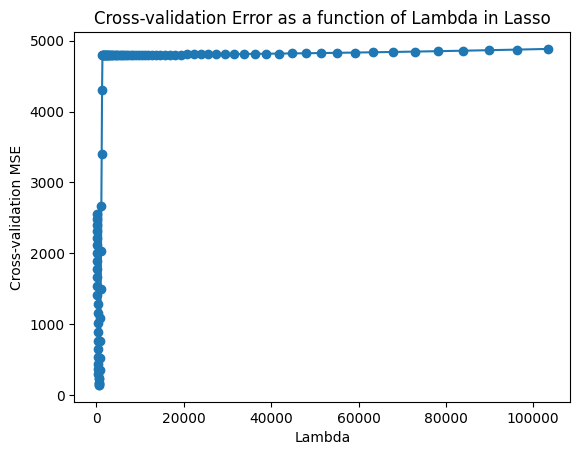

Best lambda (Lasso): 591.4716103114762
Lasso coefficients: [ 0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.10359254 -0.00497212]


In [7]:
###(f)
import numpy as np
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# 生成數據
np.random.seed(42)
n = 100
X = np.random.normal(size=n)
epsilon = np.random.normal(size=n)

# 設定新的模型參數
beta_0 = 1
beta_7 = 0.8

# 根據新的模型生成 Y (僅包含 X^7)
Y_new = beta_0 + beta_7 * X**7 + epsilon

# 生成 X 到 X^10 的多項式特徵
X_poly = np.column_stack([X**i for i in range(1, 11)])

# (f) 前向逐步選擇
model = LinearRegression()
sfs_forward = SequentialFeatureSelector(
    model,
    n_features_to_select="auto",      # 自動選擇特徵數量
    direction="forward",              # 前向選擇
    scoring="neg_mean_squared_error", # 評分方式為負均方誤差
    cv=5                              # 5 折交叉驗證
)
sfs_forward.fit(X_poly, Y_new)

# 獲取前向選擇出的特徵
selected_features_forward = sfs_forward.get_support()

# 使用選中的特徵重新擬合線性回歸模型
model.fit(X_poly[:, selected_features_forward], Y_new)
coefficients_forward = model.coef_
intercept_forward = model.intercept_

# 輸出前向選擇結果
print("Selected features (forward stepwise):", selected_features_forward)
print("Intercept (forward):", intercept_forward)
print("Coefficients (forward):", coefficients_forward)

# (f) Lasso 模型選擇
lasso = LassoCV(cv=5).fit(X_poly, Y_new)

# 繪製 Lasso 的交叉驗證曲線
plt.plot(lasso.alphas_, np.mean(lasso.mse_path_, axis=1), marker='o')
plt.xlabel("Lambda")
plt.ylabel("Cross-validation MSE")
plt.title("Cross-validation Error as a function of Lambda in Lasso")
plt.show()

# Lasso 模型的最佳係數
print("Best lambda (Lasso):", lasso.alpha_)
print("Lasso coefficients:", lasso.coef_)
